## Importing libraries and dataset.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('data/pokemon.csv', index_col=0)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Seaborn's plotting functions

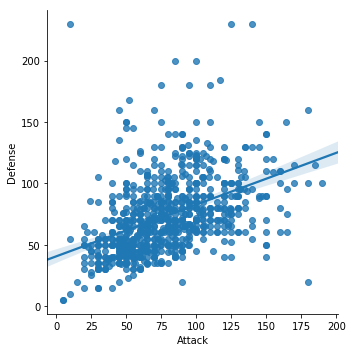

In [4]:
sns.lmplot(x='Attack', y='Defense', data=df)

## Customizing with Matplotlib

(0, 201.39035161385723)

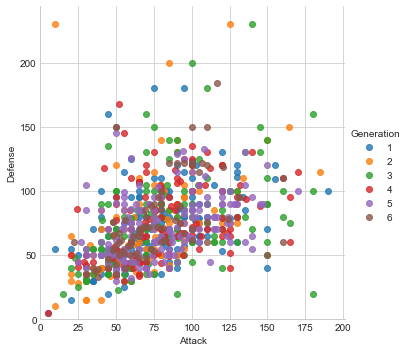

In [10]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Generation')   # Color by generation

# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

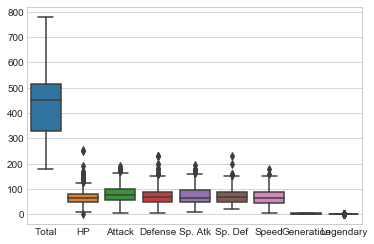

In [11]:
sns.boxplot(data=df)


In [12]:
stats_df = df.drop(['Total', 'Generation', 'Legendary'], axis=1)


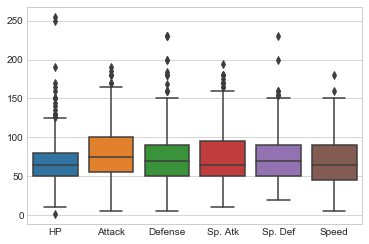

In [13]:
sns.boxplot(data=stats_df)

## Seaborn themes.

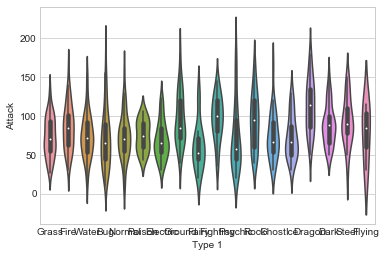

In [14]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns_plot = sns.violinplot(x='Type 1', y='Attack', data=df)
a = sns_plot.get_figure()
a.savefig('violin-output-attack-without-pallete.png')

## Color palettes.

In [17]:
#improving visualization by associating types to respective colors, as seen in Bulbapedia.
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

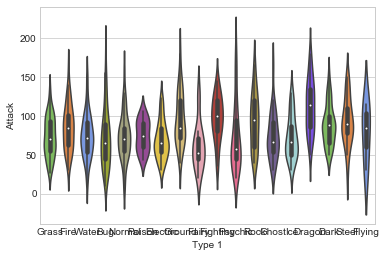

In [18]:
# Violin plot with Pokemon color palette
sns_plot = sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette
a = sns_plot.get_figure()
a.savefig('violin-output-attack-with-pallete.png')

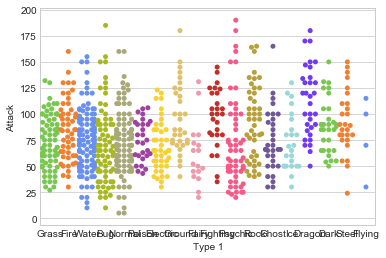

In [19]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

In [20]:
plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

## Overlaying plots

Text(0.5,1,'Ataque por tipo')

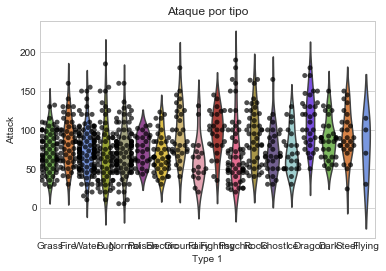

In [21]:
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None,
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', 
              alpha=0.7)
 
plt.title('Ataque por tipo')

## Putting it all together.

In [22]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


In [23]:
print( stats_df.shape )
print( melted_df.shape )

(800, 9)
(4800, 5)


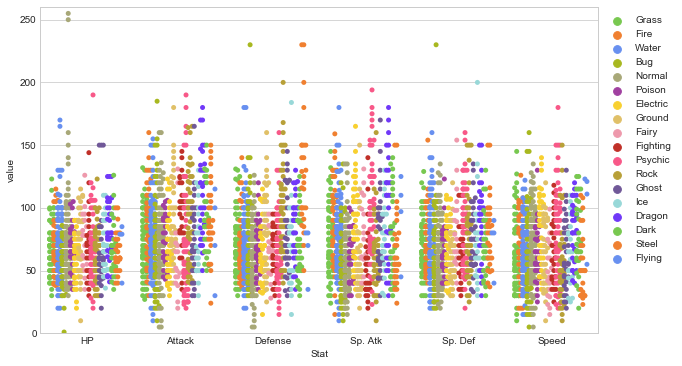

In [24]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## Pokédex (mini-gallery).

### Heatmap

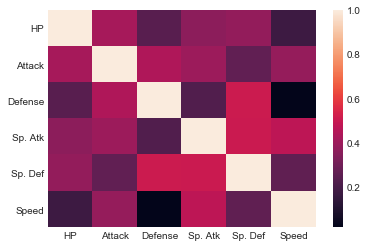

In [25]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

### Histogram

/home/daniel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


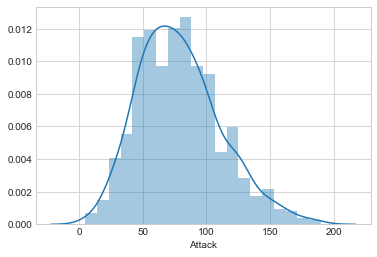

In [26]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### Bar Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

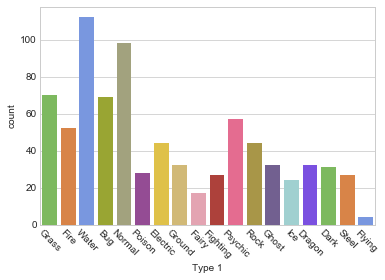

In [27]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

### Factor Plot

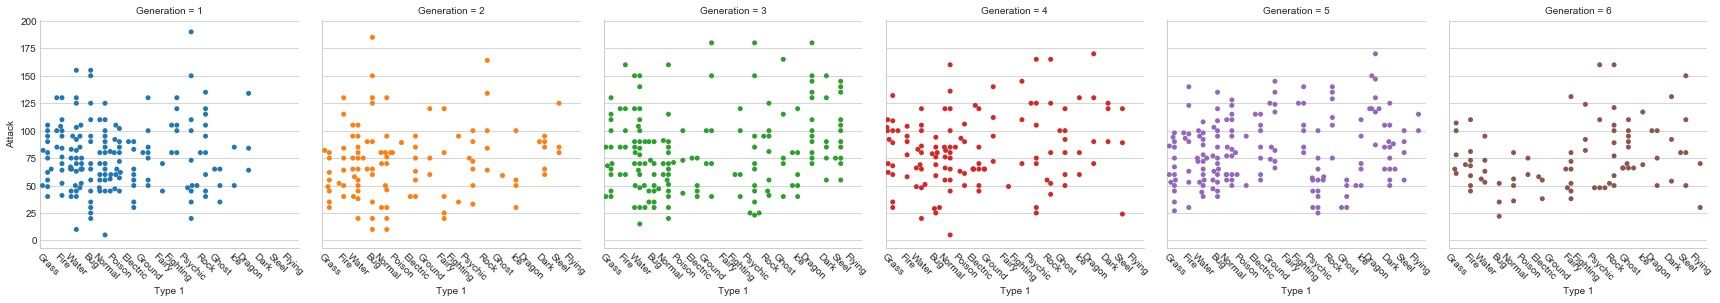

In [28]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Generation',  # Color by stage
                   col='Generation',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)


### Density Plot

(0, 217.08398025245987)

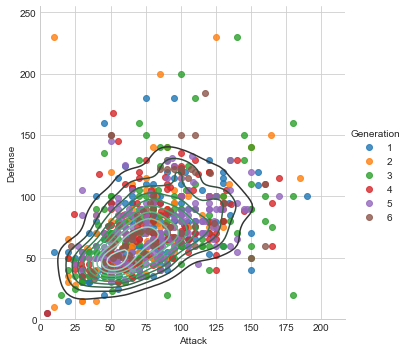

In [44]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Generation')

sns.kdeplot(df.Attack, df.Defense)
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

### Joint Distribution Plot

/home/daniel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/daniel/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


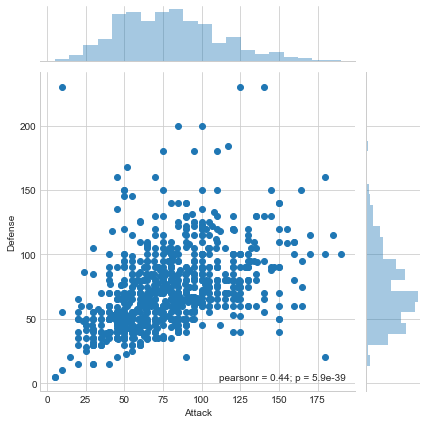

In [29]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)
